# An Alternative Spec for the Antenna $S_{11}$ of Reionization Experiments. 

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
C=3e8
PI=np.pi

The current $S_{11}$ spec requires that the integration time be no more than some fraction of the integration time if the system noise were entirely due to the sky, in the low-band. Over the high band, the requirement is set by a system temperature of $500$ K. However, in all of the sensitivity calculations that have been performed, some non-zero receiver noise was always assumed and so this particular spec is probably too stringent over the middle of the band where the receiver temperature is significant compared to the sky-temperature, and not stringent enough above $150$\,MHz high end where the 100\,K receiver temperature assumed in most sensitivity studies yields a system temperature significantly below 500 K. 

Instead, I propose that we set our spec such that the fractional change in integration time be defined as the increase in integration time over the case where the receiver noise equals 100K (as it is in EW+2016b and Pober 2014). I try out a spec where the integration time does not exceed 150% of the $T_0=100$K integration time. This spec is tenable across the entire 200MHz proposed bandwidth of HERA unlike the old spec. We note that when the aperture effeciency being less than $T_{rx}/T_0$, it is impossible to obtain $f=1$ so we in this memo we settle for $150\%$. Better efficiencies may be possible with lower receiver temperatures and increased aperture efficiencies. 

The spec was originally
\begin{equation}
S_{11} < 1-\frac{T_{rx}}{\epsilon(\sqrt{f}-1)T_{sky}}
\end{equation}
with our change $T_0=100$K, the suggested spec is
\begin{equation}
S_{11} < 1-\frac{T_{rx}}{\epsilon(\sqrt{f}(T_{sky}+T_0)-T_{sky})}
\end{equation}

In [16]:
fAxis=(150+np.arange(-110,110))*1e6
Tsky=60.*(C/fAxis)**2.55
Trx=85.
eps=0.74
FTIME=1.5
T0=100.
s11SpecLow=1.-Trx/(eps*Tsky*(np.sqrt(FTIME)-1.))
s11SpecMid=np.ones_like(s11SpecLow)-Trx/(100.)
s11SpecHigh=1.-Trx/(eps*(500-Tsky))
s11SpecAlt=1.-Trx/(eps*(Tsky+T0)*(np.sqrt(FTIME)-Tsky/(Tsky+T0)))
s11SpecAll=np.zeros_like(s11SpecLow)
for m in range(len(s11SpecLow)):
    #print [s11SpecLow[m],s11SpecMid[m],s11SpecHigh[m]]
    select=np.invert(np.array([s11SpecLow[m],
                               s11SpecMid[m],
                               s11SpecHigh[m]])>=1.)
    s11SpecAll[m]=np.max(np.array([s11SpecLow[m],
                                   s11SpecMid[m],
                                   s11SpecHigh[m]])[select])

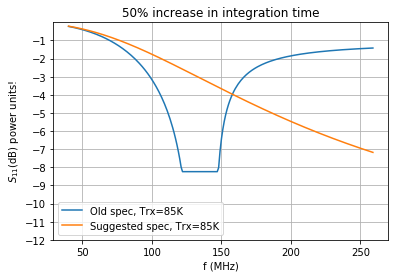

In [17]:
plt.title('50% increase in integration time')
plt.plot(fAxis/1e6,10.*np.log10(s11SpecAll),label='Old spec, Trx=85K')
plt.plot(fAxis/1e6,10.*np.log10(s11SpecAlt),label='Suggested spec, Trx=85K')
plt.ylabel('$S_{11}$(dB) power units!')
plt.xlabel('f (MHz)')
plt.ylim(-12,0)
plt.gca().set_yticks(np.arange(-12,0))
plt.grid()
plt.legend()

Lets take a look at how the sensitivities between these two specifications compare by taking the ratio of the predicted system temperatures squared.

In [18]:
def tSystem(trx,deff,freq,s11):
    return 60.*(C/freq)**2.55+trx/(deff*(1.-s11))

First, here are the system temperatures for the two specs. Below 150 MHz, the AP spec leads to a $\sim 10\%$ smaller system temperature. Above 150MHz, this system temperature exceeds both the sky and proposed spec by a factor of a few.

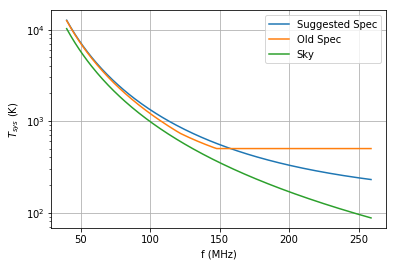

In [19]:
plt.plot(fAxis/1e6,tSystem(Trx,eps,fAxis,s11SpecAlt),label='Suggested Spec')
plt.plot(fAxis/1e6,tSystem(Trx,eps,fAxis,s11SpecAll),label='Old Spec')
plt.plot(fAxis/1e6,Tsky,label='Sky')
plt.xlabel('f (MHz)')
plt.ylabel('$T_{sys}$ (K)')
plt.yscale('log')
plt.grid()
plt.legend(loc='best')

Now lets inspect the ratios in the sensitivities as a funtion of frequency. We see that below 150MHz, the proposed spec is within $10-20\%$ of the AP spec. However, between 150 and 200MHz, the sensitivity goes down by a factor of $\approx 2$. 

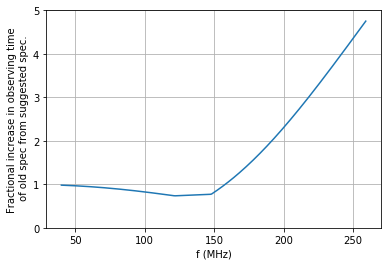

In [23]:
plt.plot(fAxis/1e6,
         (tSystem(Trx,eps,fAxis,s11SpecAlt)/
          tSystem(Trx,eps,fAxis,s11SpecAll)
         )**-2)
plt.xlabel('f (MHz)')
plt.ylabel('Fractional increase in observing time\n of old spec from suggested spec.')
plt.ylim(0,5)
plt.grid()